# Web Experience Auto-App Creation Tool

This notebook creates a copy of:
- Web Experience application 
- Web Map used in the Web Experience
- Creates a new View based on a desired feature services

All three features services will be published in a new folder.

In [81]:
# Connect to the GIS portal

from arcgis.gis import GIS, Item
from getpass import getpass as pwd
import arcpy

# Change "username" to your AGOL-username
user_name = "colin.langhorn_Yondr"
pwd = pwd()
source = GIS("https://yondr.maps.arcgis.com/", user_name, pwd,  expiration=9999)
# gis = GIS()
print (f"Successfully logged in as: {source}")

# AGOL DEV
# target = GIS('https://yondrdev.maps.arcgis.com/','YondrDev' , 'df1ZDR5vhG2a')
# GISMO
target = GIS('https://gismo.yondrgroup.com/portal/home','yondr.publisher' , '7ZhHZG7ebuMHh4k')
print (f"Successfully logged in as: {target}")

Successfully logged in as: GIS @ https://Yondr.maps.arcgis.com version:10.3
Successfully logged in as: GIS @ https://gismo.yondrgroup.com/portal/home version:9.2


### Environment Varibles
Fill out this section carefully by setting up all the proper inputs for creating a new Web Experience application

In [104]:
# New folder to pulish the Web Experience and its feature services
new_folder = 'GISMO Test'

# Name of the WebMap used in the Web Experience
# WebMap_name = 'Master Client Interface'
WebMap_name = 'Gismo 1.0 Map'
# Name of the Web Experience app
ExB_name =  'GISMO 1.0 Dev Manager App'

# New name of the WebMap
WebMap_new = 'Gismo 1.0 Map Test'
# Name of the new Web Experience
ExB_new = 'GISMO 1.0 Dev Manager App Test'

# Feature layer that will be used to create a new view
# view_lyr = 'ActiveSitesPRD'
# view_lyr_new = 'ActiveSitesCactus-test'
# # Definition query for view
# view_qry = "CactusGismoAppr = 'True'"

print("Variables are now set!")

Variables are now set!


### Tool Process
All steps below do not require any modifications.
Each step should have some sort of "success" output, if
any step fails the process will not work and must be restarted.

In [82]:
# create new folder
dest_folder = target.content.create_folder(folder=new_folder)
dest_folder

{'username': 'yondr.publisher',
 'id': '912b8f9f13ab40b8906a9f4c55d10d09',
 'title': 'GISMO Test'}

In [105]:
from arcgis.mapping import WebMap
# Get WebMap and the Feature Layer View (ActiveSites) AGOL item

client_map = source.content.search(WebMap_name, item_type='Web Map')[0]
client_map = source.content.search('6a43cfcd601749af9ed9f2cde8ae58da', item_type='Web Map')[0]
wm = WebMap(client_map)
# Build a dictionary to map the layers
old_layers = []
# for lyr in wm.layers:
#     if lyr.layerType == "GroupLayer":
#         print(lyr.title)
#         for l in lyr.layers:
#             print('    ' , l.title, l.id, l.url)
#     else:
#         print(lyr.title, lyr.id, lyr.url)


for lyr in wm.layers:
    if 'url' in lyr:                
        d = {"title": lyr.title, 
             "itemid" :lyr.itemId, 
             "url": lyr.url}
        old_layers.append(d)   
    elif 'layerType' in lyr and lyr.layerType =="GroupLayer":
        for sublyr in lyr.layers:
            if 'url' in sublyr:                
                d = {"groupTitle": lyr.title,
                    "title": sublyr.title, 
                     "itemid" :sublyr.itemId, 
                     "url": sublyr.url}
                old_layers.append(d)   

print(old_layers)

    # print(lyr.Url)
    # print(lyr.itemId)
# lyrs = []
# for item in client_map:
#     print(item)
#     active_site = item

# active_site

[{'groupTitle': 'Gismo Site', 'title': 'Site Boundary', 'itemid': '4c52b7a5d2ce44bcbbab8686971ab317', 'url': 'https://utility.arcgis.com/usrsvcs/servers/4c52b7a5d2ce44bcbbab8686971ab317/rest/services/YondrData/GismoSite/FeatureServer/1'}, {'groupTitle': 'Gismo Site', 'title': 'Site', 'itemid': '4c52b7a5d2ce44bcbbab8686971ab317', 'url': 'https://utility.arcgis.com/usrsvcs/servers/4c52b7a5d2ce44bcbbab8686971ab317/rest/services/YondrData/GismoSite/FeatureServer/0'}, {'title': 'Data Center', 'itemid': 'a63fbd9338a946db9ce5ad0b2c506e4f', 'url': 'https://services6.arcgis.com/yoQT8hnhlucS3D19/arcgis/rest/services/GlobalDCInfrastruture/FeatureServer/0'}, {'groupTitle': 'Submarine Cable', 'title': 'Submarine Cable', 'itemid': '6c9b79e629f34d18aea65e32602bff64', 'url': 'https://services6.arcgis.com/yoQT8hnhlucS3D19/arcgis/rest/services/SubmarineCable/FeatureServer/2'}, {'groupTitle': 'Submarine Cable', 'title': 'Landing Point', 'itemid': '6c9b79e629f34d18aea65e32602bff64', 'url': 'https://servic

In [49]:
# Copy WebMap and move into the folder
newmap = client_map.copy(title=WebMap_new)
objMoved = newmap.move(folder=dest_folder["title"])
print(objMoved)


{'success': True, 'itemId': '09769fbdd0db4f3a843c83fb958288a1', 'owner': 'colin.langhorn_Yondr', 'folder': 'c1f17b420c05449f86b03d569536c4d2'}


In [106]:

import json

client_map_json = client_map.get_data(try_json=True)
web_map_properties = {'title': wm.item.title,
                      'type': 'Web Map',
                      'snippet':wm.item.snippet,
                      'tags': wm.item.tags,
                      'text': json.dumps(client_map_json)}


web_map_item = target.content.add(web_map_properties)
print(web_map_item)

<Item title:"Gismo 1.0 Map" type:Web Map owner:yondr.publisher>


In [71]:
web_map_item

<Item title:"AGOL-Gismo 1.0 Map" type:Web Map owner:colin.langhorn_Yondr>

In [ ]:
def findItem()
try:
    for lyr in lyrs:
        if 'url' in lyr and not found_it:                
            found_it = lyr_to_find.lower() in lyr.url.lower()     
        elif 'layerType' in lyr and lyr.layerType =="GroupLayer":
            for sublyr in lyr.layers:
                if 'url' in sublyr and not found_it:                
                    found_it = lyr_to_find.lower() in sublyr.url.lower()
except Exception as error:
    print(f'{item.title} led to an error')
    print(error)
    display(item)
    continue

In [141]:
# Update the WebMap to use the new layers
new_map = target.content.search('39228f825d1740f785479f0bc296141b', item_type='Web Map')[0]
wm_new = WebMap(new_map)

layer_mapper = {}
for item in old_layers:
    # Find item in new portal based on title
    title = item['title']
    try:
        old_url = item['url']
        old_id = item['itemid']
        if 'groupTitle' in item:
            grouptitle = item['groupTitle']
            new_layer = target.content.search(grouptitle, item_type='Feature Layer')[0]
            new_id = new_layer.id
            for sublyr in new_layer.layers:
                if sublyr.properties.name == title:
                    new_url = sublyr.url
        else:
            new_layer = target.content.search(title, item_type='Feature Layer')[0]
            new_url = new_layer.url
            new_id = new_layer.id

        for lyr in wm_new.layers:
        # Bug with comparing arcgis vs. ArcGIS in url
            if 'layerType' in lyr and lyr.layerType =="GroupLayer":
                for sublyr in lyr.layers:
                    if old_url.lower() == sublyr['url'].lower():
                        print('this is updated')
                        sublyr['url'] = new_url
                        sublyr['itemId'] = new_id
                        target.update_properties(wm_new)
            elif 'url' in lyr and old_url.lower() == lyr['url'].lower():
                lyr['url'] = new_url
                lyr['itemId'] = new_id
                target.update_properties(wm_new)
            # print ("Service Updated for " + lyr['title'])
    except Exception as e:
        print('error', e.args[0])
wm_new.update()

this is updated
this is updated
this is updated
this is updated


True

In [127]:
# Update the WebMap to use the new layers



grouptitle = 'Gismo Site'
new_layer = target.content.search(grouptitle, item_type='Feature Layer')[0]
print(new_layer.layers[0].properties.name)
# for sublyr in new_layer.layers:
#     print(sublyr)
#     if sublyr.title == title:
#         new_url = new_layer.url


Site


In [8]:
newmap

<Item title:"Cactus Client Interface" type:Web Map owner:colin.langhorn_Yondr>

# Copy The Experience App

In [9]:
# Define a function for copying the Web Experience 
import os
import uuid
import json
import shutil
import tempfile

from arcgis import __version__

_version = [int(i) for i in __version__.split('.')]

# Build some helper functions
def export_resources(item, save_path=None, file_name=None):
    """Export's the data's resources as a zip file"""
    url = \
        f'{item._gis._portal.resturl}content/users/{item._user_id}/items/{item.itemid}/resources/export'
    if save_path is None:
        save_path = tempfile.gettempdir()
    if file_name is None:
        file_name = f"{uuid.uuid4().hex[:6]}.zip"
    params = {'f' : 'zip'}
    con = item._gis._portal.con
    resources = con.get(url, params=params,
                        out_folder=save_path,
                        file_name=file_name,
                        try_json=False)
    return resources

print("Function Sucessfully Created :)")

Function Sucessfully Created :)


<Item title:"Master GISMO Client Portal" type:Web Experience owner:yondrgroup1>
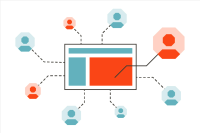

In [10]:
# Get the Client App Web Experience
client_app_id = gis.content.search(ExB_name, item_type='Web Experience')[0]
client_app = gis.content.get(client_app_id.id)
resource = client_app.resources.export()
client_app

In [11]:
# Collect the Web Maps and Express Maps using the Experience's data. Use the set 
# operator each item is collected only once for cloning.
client_app_json = client_app.get_data(try_json=True)

# for k, v in client_app_json['dataSources'].items():
#     print(v['type']) 

web_maps = ([v['itemId'] for k, v in client_app_json['dataSources'].items() \
                if v['type'].find('WEB_MAP')>-1])

web_maps

['dc40a31dc3b84ca789982fb27f3bdf90']

In [12]:
# Create a dictionary map of old and new item ids
webmap_mapper = {}
webmap_mapper[web_maps[0]] = newmap.itemid
webmap_mapper


{'dc40a31dc3b84ca789982fb27f3bdf90': '79a51a28eead456bb63a30937976308a'}

In [13]:
# Replace the Web Experience Json with the new item ids
client_app_text = json.dumps(client_app_json)

for k, v in webmap_mapper.items():
    client_app_text = client_app_text.replace(k, v) # replace the IDs
    print(f'old id: {k}, new id: {v}')

old id: dc40a31dc3b84ca789982fb27f3bdf90, new id: 79a51a28eead456bb63a30937976308a


In [14]:
# Create the New Web Experience
new_item = gis.content.add({'type' : client_app.type,
                                 'tags' : client_app.tags,
                                 'title' : ExB_new,
                                 'description' : client_app.description,
                                 'typeKeywords' : client_app.typeKeywords,
                                 'extent' : client_app.extent,
                                 'text' :client_app_text}
                                )
new_item.resources.add(resource, archive=True)

{'success': True,
 'itemId': '4eb203b399d74146b6f45af00a8b6782',
 'owner': 'colin.langhorn_Yondr',
 'folder': 'null'}

In [15]:
new_item.update({'url': client_app.url.replace(client_app.id, new_item.id)})

True

In [16]:
# Final modifications of Web Experience
with tempfile.NamedTemporaryFile(mode='w', suffix='.json', 
                                 dir=tempfile.gettempdir(), 
                                 delete=False) as jsonfile:
    jsonfile.write(json.dumps(new_item.get_data()))
    new_item.resources.add(file=jsonfile.name)
    type_keywords = [tk for tk in new_item.typeKeywords if 'smdraftresourceid:' not in tk]
    type_keywords.append(f'smdraftresourceid:{os.path.basename(jsonfile.name)}')
    new_item.update({'typeKeywords' : type_keywords})

# Move to the folder
new_item.move(folder=dest_folder["title"])
new_item

<Item title:"Cactus GISMO Client Portal" type:Web Experience owner:colin.langhorn_Yondr>

## Utils for Webmaps
This sections is not used for copying the Experience Builder application

In [17]:
# Inspect Webmap
from arcgis.mapping import WebMap

def is_hosted(item):
    return [keyword for keyword in item.typeKeywords if "Hosted" in keyword] 

def print_webmap_inventory(wm):
    wm_obj = WebMap(wm)
    print(f"{wm_obj.item.title}\n{'-'*100}")
    for wm_layer in wm_obj.layers:
        try:
            if is_hosted(Item(gis, wm_layer['itemId'])):
                print(f"{' '*2}{wm_layer['title']:40}HOSTED{' ':5}"
                        f"{wm_layer['layerType']:20}{dict(wm_layer)['itemId']}")
            else:
                print(f"{' '*2}{wm_layer['title']:40}other{' ':6}"
                        f"{wm_layer['layerType']:20}{wm_layer.id}") 
        except:
            print(f"{' '*2}{wm_layer['title']:40}other{' ':6}"
                    f"{wm_layer['layerType']:20}{wm_layer.id}")
        print("\n")

print_webmap_inventory(client_map)

ClientInterfaceDEV
----------------------------------------------------------------------------------------------------
  Redbrick_ActiveSitesPRD_view            HOSTED     ArcGISFeatureLayer  444b102ad0d1421b8379b782d0916df8


  ActiveSitesPRD_2_viewrbk                other      ArcGISFeatureLayer  180998dc01e-layer-39


  ActiveSitesRBKQUAT                      other      ArcGISFeatureLayer  18098ce1c0b-layer-38


  Active Sites                            HOSTED     ArcGISFeatureLayer  1cc1f27d71b04007b314b2baef9a1a04


  Availability Zone Global                other      ArcGISFeatureLayer  17e9e878ea0-layer-21


  Data Center                             HOSTED     ArcGISFeatureLayer  a63fbd9338a946db9ce5ad0b2c506e4f


  Internet Exchange                       HOSTED     ArcGISFeatureLayer  a63fbd9338a946db9ce5ad0b2c506e4f


  Site Boundaries                         HOSTED     ArcGISFeatureLayer  ea190df2128846109280d9bfba996335


  Substation                              HOSTED    